In [112]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.impute import KNNImputer

np.random.seed(109)

(array([1525., 2527., 1613.,    4.,  160.,  163.,   44.,   21.,   10.,
           7.,    3.,    0.,    0.,    0.,    0.,  518.,  192.,  211.,
         214.,  229.,  239.,  257.,  247.,  315.,  304.,  278.,  294.,
         280.,  196.,   81.]),
 array([-22.0586758 , -20.60767123, -19.15666667, -17.7056621 ,
        -16.25465753, -14.80365297, -13.3526484 , -11.90164384,
        -10.45063927,  -8.9996347 ,  -7.54863014,  -6.09762557,
         -4.646621  ,  -3.19561644,  -1.74461187,  -0.29360731,
          1.15739726,   2.60840183,   4.05940639,   5.51041096,
          6.96141553,   8.41242009,   9.86342466,  11.31442922,
         12.76543379,  14.21643836,  15.66744292,  17.11844749,
         18.56945205,  20.02045662,  21.47146119]),
 <BarContainer object of 30 artists>)

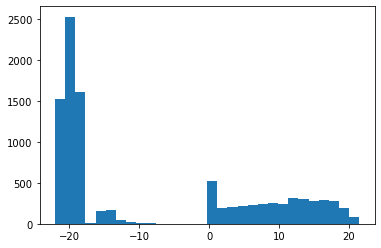

In [49]:
X_data = pd.read_csv('NHANESI_X.csv')
y_data = pd.read_csv('NHANESI_y.csv')

X_data = X_data.drop('Unnamed: 0', axis = 1)
y_data = y_data.drop('Unnamed: 0', axis = 1)

plt.hist(x=y_data.values, bins=30)

In [50]:
y_data['y'] = (abs(y_data['y'])>=18)*1

print(y_data['y'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2,  random_state = 109, shuffle=True, stratify=y_data['y']
)

print(X_data.shape)
print(y_data.shape)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

1    6048
0    3884
Name: y, dtype: int64
(9932, 18)
(9932, 1)
(7945, 18) (1987, 18)
(7945, 1) (1987, 1)


In [51]:
X_data.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,35.0,92.0,126.0,2.0,77.7,12.0,5.0,165.0,135.0,1.37,7.6,2.0,142.0,323.0,41.8,5.8,31.109434,50.0
1,71.0,78.0,210.0,2.0,77.7,37.0,4.0,298.0,89.0,1.38,6.4,2.0,156.0,331.0,26.9,5.3,32.362572,78.0
2,74.0,86.0,999.0,2.0,77.7,31.0,3.8,222.0,115.0,1.37,7.4,2.0,170.0,299.0,38.5,8.1,25.388497,84.0
3,64.0,92.0,385.0,1.0,77.7,30.0,4.3,265.0,94.0,1.97,7.3,2.0,172.0,349.0,26.9,6.7,26.446610,80.0
4,32.0,70.0,183.0,2.0,77.7,18.0,5.0,203.0,192.0,1.35,7.3,1.0,128.0,386.0,49.7,8.1,20.354684,58.0


In [52]:
y_data.head()

,y
0,0
1,0
2,0
3,1
4,0


In [53]:
print("X_data # of null values for each predictor:")
print(X_data[X_data.isnull().any(axis=1)].count())
print("\ny_data # of null values for the prediction:")
print(y_data[y_data.isnull().any(axis=1)].count())

print(X_data.columns)
print(y_data.columns)



X_data # of null values for each predictor:
Age                   1339
Diastolic BP          1281
Poverty index         1339
Race                  1339
Red blood cells       1339
Sedimentation rate     513
Serum Albumin         1339
Serum Cholesterol     1339
Serum Iron            1339
Serum Magnesium       1339
Serum Protein         1339
Sex                   1339
Systolic BP           1282
TIBC                  1339
TS                    1339
White blood cells      298
BMI                   1339
Pulse pressure        1280
dtype: int64

y_data # of null values for the prediction:
y    0
dtype: int64
Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')
Index(['y'], dtype='object')


In [54]:
#X_data_dropped = X_data.dropna()
#y_data_dropped = y_data.dropna()
combined = pd.concat([X_data, y_data], axis = 1)
print(combined.shape)

combined_dropped = combined.dropna()

print(combined_dropped.shape)

X_data_dropped = combined_dropped[['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']]
y_data_dropped = combined_dropped[['y']]

print(X_data_dropped.shape)
print(y_data_dropped.shape)


#knn imputer.fit
#choose number of transmitter


(9932, 19)
(8593, 19)
(8593, 18)
(8593, 1)


In [55]:
# impute X_data with KNN imputer, n_neighbors = 1

imputer = KNNImputer(n_neighbors=1)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)
# print(imputer_result)
# print(type(imputer_result))

# turn it into a dataframe, rename columns
X_train_impute = pd.DataFrame(X_train_imputed, columns = X_data.columns)
X_test_impute = pd.DataFrame(X_test_imputed, columns = X_data.columns)

y_train = pd.DataFrame(y_train.values, columns = y_data.columns)
y_test = pd.DataFrame(y_test.values, columns = y_data.columns)

train_imputed = pd.concat([X_train_impute, y_train], axis = 1)
test_imputed = pd.concat([X_test_impute, y_test], axis = 1)

train_imputed.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,y
0,74.0,80.0,120.0,1.0,44.8,6.0,4.2,239.0,51.0,1.52,7.4,2.0,180.0,424.0,12.0,7.0,25.665631,100.0,0
1,58.0,100.0,999.0,1.0,48.6,9.0,4.7,242.0,108.0,1.97,6.8,1.0,150.0,336.0,32.1,5.2,26.462807,50.0,1
2,44.0,70.0,301.0,2.0,43.8,31.0,4.3,222.0,121.0,1.57,7.3,2.0,120.0,349.0,34.7,6.6,23.574536,50.0,1
3,71.0,75.0,100.0,1.0,44.9,23.0,4.5,259.0,85.0,1.43,7.4,1.0,180.0,321.0,26.5,7.5,24.201035,105.0,0
4,59.0,78.0,283.0,1.0,77.7,4.0,4.1,247.0,170.0,1.74,7.2,1.0,132.0,356.0,47.8,8.9,29.940744,54.0,1


In [56]:
X_train_impute.columns

Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')

In [57]:
train_sex = X_train_impute['Sex'].subtract(1)
X_train_impute['Sex'] = train_sex

test_sex = X_test_impute['Sex'].subtract(1)
X_test_impute['Sex'] = test_sex

train_race = X_train_impute['Race'].subtract(1)
X_train_impute['Race'] = train_race

test_race = X_test_impute['Race'].subtract(1)
X_test_impute['Race'] = test_race

In [58]:
X_train_impute.head()



,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,74.0,80.0,120.0,0.0,44.8,6.0,4.2,239.0,51.0,1.52,7.4,1.0,180.0,424.0,12.0,7.0,25.665631,100.0
1,58.0,100.0,999.0,0.0,48.6,9.0,4.7,242.0,108.0,1.97,6.8,0.0,150.0,336.0,32.1,5.2,26.462807,50.0
2,44.0,70.0,301.0,1.0,43.8,31.0,4.3,222.0,121.0,1.57,7.3,1.0,120.0,349.0,34.7,6.6,23.574536,50.0
3,71.0,75.0,100.0,0.0,44.9,23.0,4.5,259.0,85.0,1.43,7.4,0.0,180.0,321.0,26.5,7.5,24.201035,105.0
4,59.0,78.0,283.0,0.0,77.7,4.0,4.1,247.0,170.0,1.74,7.2,0.0,132.0,356.0,47.8,8.9,29.940744,54.0


In [70]:
# Baseline KNN regression model on dropped data
baseline_kNN_model = KNeighborsClassifier(n_neighbors=len(X_train_impute)).fit(X_train_impute,y_train.values.ravel())
    
y_pred = baseline_kNN_model.predict(X_test_impute)

baseline_kNN_model_accuracy = mean_squared_error(y_pred,y_test)
print(baseline_kNN_model_accuracy)

0.3910417715148465


In [71]:
# Logistic regression model on dropped data
logit_base = LogisticRegression(max_iter=10000).fit(X_train_impute,y_train.values.ravel())
y_pred = logit_base.predict(X_test_impute)

logit_base_test_accuracy = accuracy_score(y_pred,y_test)
print(logit_base_test_accuracy)

0.7523905385002516


In [72]:
# Logistic Regression with Lasso Regularization - Ray

In [104]:
# Cross-Validated kNN Classification - Vineet
# include plots of training and validation accuracy maybe

k_list = [1,2,3,4,5,7,10,15,20,25,40,50,75,80,100]

validation_error = []
training_error = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_impute, y_train.values.ravel())
    
    accuracies = cross_validate(knn, X_train_impute, y_train.values.ravel(), scoring = "accuracy", cv=5, return_train_score=True)

    # Compute the validation errors got after cross validation
    train_acc = accuracies['train_score'].mean()
    val_acc =  accuracies['test_score'].mean()
    
    # Append the Accuracies to their respective lists     
    validation_error.append(val_acc)
    training_error.append(train_acc)

In [105]:
max_val = max(validation_error)
k = k_list[validation_error.index(max_val)]
print(k)

20


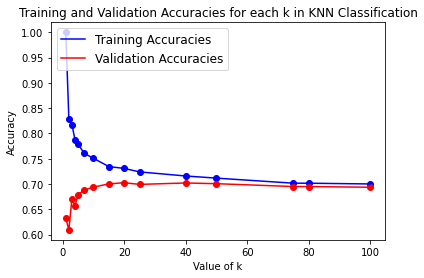

In [106]:
# scatter plot and line for training acc
plt.scatter(k_list,training_error, color="b")
plt.plot(k_list,training_error, color="b", label="Training Accuracies")

# scatter plot and line for val acc
plt.scatter(k_list,validation_error, color="r")
plt.plot(k_list,validation_error, color="r", label="Validation Accuracies")

# Labels, axes, and legend
plt.title("Training and Validation Accuracies for each k in KNN Classification")
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.legend(loc = 'upper left', fontsize = 12)

In [107]:
best_knn = KNeighborsClassifier(n_neighbors=k)
best_knn.fit(X_train_impute, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=20)

In [108]:
y_test_pred = best_knn.predict(X_test_impute)

best_knn_test_acccuracy = accuracy_score(y_test_pred, y_test)

print("The overall test classification accuracy as a percentage is: ", round(best_knn_test_acccuracy,6)*100)\

The overall test classification accuracy as a percentage is:  68.64620000000001


In [74]:
# Cross-Validated Logistic Regression with Lasso Regularization - Ray

In [75]:
# Cross-Validated Logistic Regression with Ridge Regularization - Ray

In [76]:
# Single Decision Tree Cross-Validated for parameters - Leonard

In [77]:
# Bagging - Leonard

Text(0, 0.5, 'staged score')

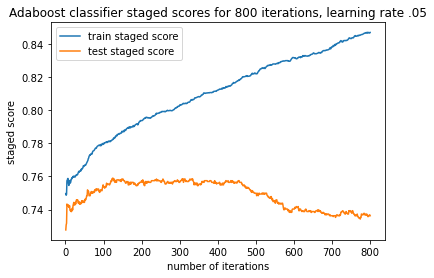

In [113]:
# Boosting - Vineet
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=800)
boost.fit(X_train_impute,y_train.values.ravel())

boost_train_staged_score = list(boost.staged_score(X_train_impute,y_train.values.ravel()))
boost_test_staged_score = list(boost.staged_score(X_test_impute,y_test.values.ravel()))

plt.plot(range(1,801), boost_train_staged_score, label = "train staged score")
plt.plot(range(1,801), boost_test_staged_score, label = "test staged score")
plt.title("Adaboost classifier staged scores for 800 iterations, learning rate .05")
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("staged score")

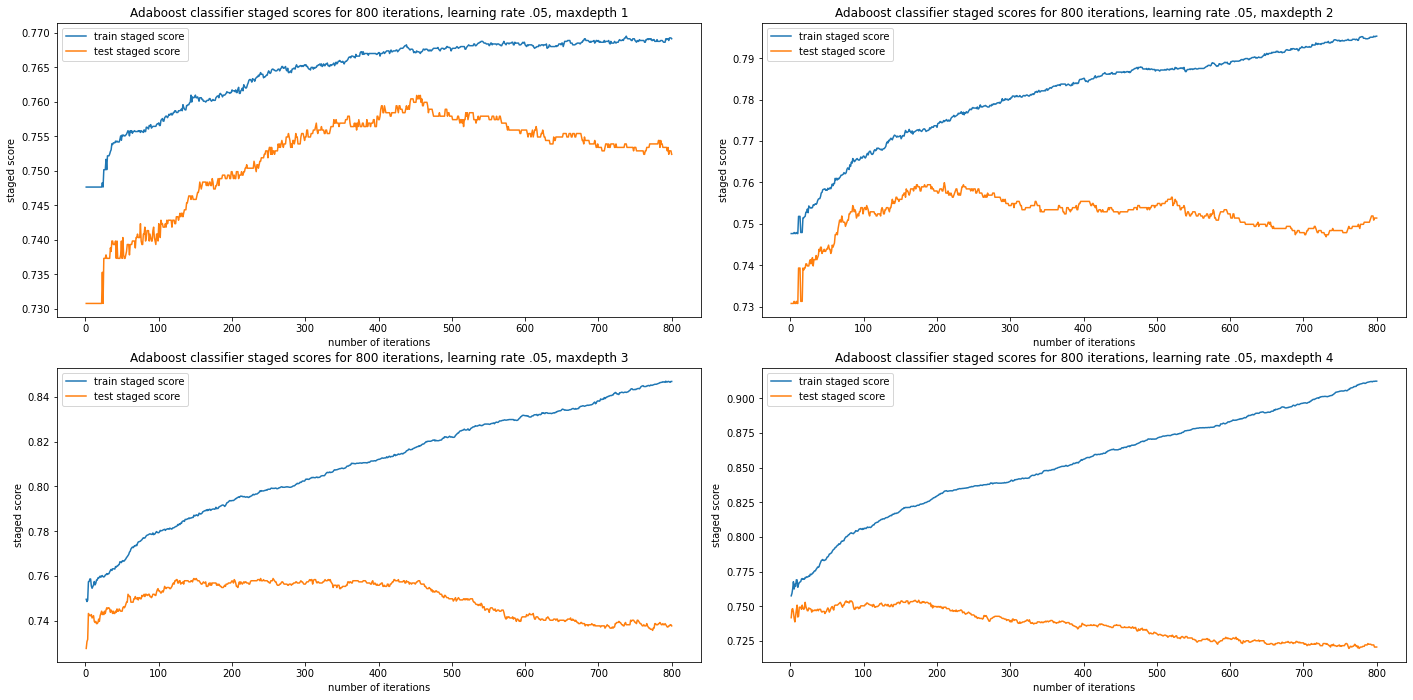

In [115]:
depths = [1,2,3,4]
fig, axs = plt.subplots(2,2, figsize=(20,10))

fig.tight_layout(pad=3.0)
axs = axs.ravel()

for i in range(len(depths)):
    boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depths[i]), learning_rate=0.05, n_estimators=800)
    boost.fit(X_train_impute,y_train.values.ravel())

    boost_train_staged_score = list(boost.staged_score(X_train_impute,y_train.values.ravel()))
    boost_test_staged_score = list(boost.staged_score(X_test_impute,y_test.values.ravel()))

    axs[i].plot(range(1,801), boost_train_staged_score, label = "train staged score")
    axs[i].plot(range(1,801), boost_test_staged_score, label = "test staged score")
    axs[i].set_title("Adaboost classifier staged scores for 800 iterations, learning rate .05, maxdepth " + str(depths[i]))
    axs[i].legend()
    axs[i].set_xlabel("number of iterations")
    axs[i].set_ylabel("staged score")

In [119]:
boost_depth3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=120)
boost_depth3.fit(X_train_impute,y_train.values.ravel())

boost_depth3_train_score = boost_depth3.score(X_train_impute,y_train.values.ravel())
boost_depth3_test_score = boost_depth3.score(X_test_impute,y_test.values.ravel())

boost_depth3_train_score, boost_depth3_test_score

(0.7814977973568282, 0.7569199798691495)

In [79]:
# Random Forest - Sean

In [80]:
# Neural net to compare maybe at end if feeling frisky